# Frequência n-gramas + Word2Vec

In [1]:
import pandas as pd
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer 
import gensim.models.keyedvectors as word2vec
from nltk import ngrams

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('job_bioinfo_csv/bioinf_vagas_preprocessado.csv')

In [3]:
titulos = df.title_result.values
titulos = [unidecode(x.lower()) for x in titulos]

titulos[0:5]

['bioinformatics specialist gis',
 'postdoctoral fellowship bioinformatics molecular metabolism',
 'bioinformatics analyst bar harbor united states',
 'postdoctoral fellow bioinformatics genomics',
 'postdoctoral position bioinformatics microbial metagenomics f d']

In [4]:
texto = df.text_result.values
texto = [unidecode(x.lower()) for x in texto]

texto[0:2]

['genomics institute singapore exciting opportunity bioinformatics specialist join population scale genomics initiative aims create comprehensive data bank integrated genetic clinical lifestyle data pilot phase effort completed whole genome sequencing k individuals delivered catalogue common genetic variants across three ethnic populations wu et al challenge scale genetic data production k individuals joining multi disciplinary team involved efforts set high throughput data analysis workflow devise solutions managing controlling access petabytes information eventually apply developed tools deliver one largest population genomics efforts singapore date',
 'laboratories drs jeffrey pessin fajun yang deyou zheng albert einstein college medicine jointly seeking recently graduated ph experience bioinformatics analysis high throughout sequencing data rna seq chip seq atac seq pro seq hi c c seq albert einstein college medicine equal opportunity affirmative action employer qualified applicant

In [5]:
def get_ngrams(text, ngram_from=1, ngram_to=1, n=None, max_features=2000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [6]:
lista_tupla1 = get_ngrams(titulos, ngram_from=2, ngram_to=4, n=300)[:200]
lista_tupla1

[('computational biology', 456),
 ('bioinformatics scientist', 121),
 ('scientist bioinformatics', 119),
 ('biostatistics bioinformatics', 111),
 ('scientist computational', 99),
 ('scientist computational biology', 96),
 ('bioinformatics analyst', 82),
 ('principal scientist', 74),
 ('postdoctoral fellow', 71),
 ('software developer', 65),
 ('fellow computational', 58),
 ('fellow computational biology', 58),
 ('duke university', 52),
 ('assistant professor', 51),
 ('research scientist', 50),
 ('principal scientist computational', 49),
 ('research associate', 48),
 ('biology bioinformatics', 47),
 ('developer bioinformatics', 47),
 ('principal scientist computational biology', 47),
 ('software developer bioinformatics', 46),
 ('bioinformatics research', 45),
 ('bioinformatics computational', 45),
 ('project manager', 45),
 ('tenure track', 42),
 ('bioinformatics specialist', 40),
 ('postdoctoral position', 40),
 ('engineer bioinformatics', 39),
 ('postdoctoral fellow computational', 39

In [7]:
list_ngram = []
for tup in lista_tupla1:
    list_ngram.append(tup[0])
list_ngram

['computational biology',
 'bioinformatics scientist',
 'scientist bioinformatics',
 'biostatistics bioinformatics',
 'scientist computational',
 'scientist computational biology',
 'bioinformatics analyst',
 'principal scientist',
 'postdoctoral fellow',
 'software developer',
 'fellow computational',
 'fellow computational biology',
 'duke university',
 'assistant professor',
 'research scientist',
 'principal scientist computational',
 'research associate',
 'biology bioinformatics',
 'developer bioinformatics',
 'principal scientist computational biology',
 'software developer bioinformatics',
 'bioinformatics research',
 'bioinformatics computational',
 'project manager',
 'tenure track',
 'bioinformatics specialist',
 'postdoctoral position',
 'engineer bioinformatics',
 'postdoctoral fellow computational',
 'postdoctoral fellow computational biology',
 'bioinformatics software',
 'software engineer',
 'senior scientist',
 'senior bioinformatics',
 'division biostatistics',
 'div

In [ ]:
#Somente para teste de comparação com original
#index2word[500000:800000]
#Sentences="computational biology . bioinformatics scientist . scientist bioinformatics . Splinter Cell Chaos Theory . I am a good boy . MedPage Today Staff Writer . Rahul Ghandhi will be next Prime Minister . APJ Abdul Kalam was an Indian scientist "
#Sentences

In [8]:
Sentences = []

for value in list_ngram:
    Sentences.append(value)
    
Sentences = ' . '.join(Sentences)

Sentences

'computational biology . bioinformatics scientist . scientist bioinformatics . biostatistics bioinformatics . scientist computational . scientist computational biology . bioinformatics analyst . principal scientist . postdoctoral fellow . software developer . fellow computational . fellow computational biology . duke university . assistant professor . research scientist . principal scientist computational . research associate . biology bioinformatics . developer bioinformatics . principal scientist computational biology . software developer bioinformatics . bioinformatics research . bioinformatics computational . project manager . tenure track . bioinformatics specialist . postdoctoral position . engineer bioinformatics . postdoctoral fellow computational . postdoctoral fellow computational biology . bioinformatics software . software engineer . senior scientist . senior bioinformatics . division biostatistics . division biostatistics bioinformatics . fellow bioinformatics . bioinforma

In [9]:
documents=df['title_result']

In [10]:
#rodar apenas uma vez
model=word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin.gz', binary=True)

# **3.0 Generate all bigrams,trigrams and fourgrams from the brown corpus**

In [11]:
index2word = model.index_to_key
print("The number of words:", len(index2word))

The number of words: 3000000


In [12]:
#unigram=list(ngrams(Sentences.lower().split(),1))
bigram=list(ngrams(Sentences.lower().split(),2))
trigram=list(ngrams(Sentences.lower().split(),3))
fourgram=list(ngrams(Sentences.lower().split(),4))

In [13]:
print("Total pairs generated are:",len(bigram+trigram+fourgram))

Total pairs generated are: 2127


# **4.0 Identify Phrases(bigrams,trigrams,fourgrams) Using Word2Vec**

In [ ]:
# print("Unigrams:")

# unigrams = []
# for word in index2word:
#     for x in unigram:
#         if word.lower() == x[0]:
#             print(word, "=", x[0])
#             unigrams.append(word)

In [31]:
print("Bigrams:")

ngrams = []
for word in index2word:
    for x in bigram:
        if word.lower() == x[0] + "_" + x[1]:
            print(word)
            ngrams.append(word)

Bigrams:
Medical_Center
Medical_Center
Medical_Center
associate_professor
assistant_professor
assistant_professor
Associate_Professor
Assistant_Professor
Assistant_Professor
Associate_Director
Southwestern_Medical
Southwestern_Medical
Southwestern_Medical
Southwestern_Medical
Southwestern_Medical
postdoctoral_fellow
postdoctoral_fellow
postdoctoral_fellow
postdoctoral_fellow
postdoctoral_researcher
Human_Genetics
postdoctoral_research
Systems_Biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
computational_biology
postdoctoral_asso

In [59]:
print("Trigrams:")

trigrams = []
for word in index2word:
    for x in trigram:
        if word.lower() ==x[0]+"_"+x[1]+"_"+x[2]:
            print(word)
            ngrams.append(word)

Trigrams:


In [ ]:
print("Fourgrams:")

fourgrams = []
for word in index2word:
    for x in fourgram:
        if word.lower() ==x[0]+"_"+x[1]+"_"+x[2]+"_"+x[3]:
            print(word)
            ngrams.append(word)

In [51]:
#backup = df_ngrams = pd.DataFrame(ngrams, columns=['ngram'])
df_ngrams = backup

In [34]:
df_ngrams = pd.DataFrame(ngrams, columns=['ngram'])

In [52]:
len(df_ngrams)

180

In [53]:
df_ngrams

,ngram,contagem
0,Medical_Center,3
1,Medical_Center,3
2,Medical_Center,3
3,associate_professor,1
4,assistant_professor,2
...,...,...
175,SCHOOL_PROGRAM,6
176,SCHOOL_PROGRAM,6
177,proteomics_bioinformatics,1
178,ASSISTANT_PROFESSOR,2


In [54]:
df_ngrams['contagem'] = df_ngrams.groupby('ngram')['ngram'].transform('count')
#df_ngrams = df_ngrams.drop_duplicates().reset_index(drop=True)
df_ngrams['ngram'] = df_ngrams['ngram'].str.lower()

# df_ngrams.sort_values('contagem', ascending=False)

In [57]:
#remove linhas com ngram duplicados
interesse = ['ngram']
df_ngrams = df_ngrams.drop_duplicates(subset = interesse)
df_ngrams.sort_values('contagem', ascending=False)

,ngram,contagem
23,computational_biology,24
148,software_developer,9
171,school_program,6
157,medical_school,6
92,project_manager,5
10,southwestern_medical,5
113,duke_university,5
15,postdoctoral_fellow,4
76,biomedical_informatics,3
118,immuno_oncology,3


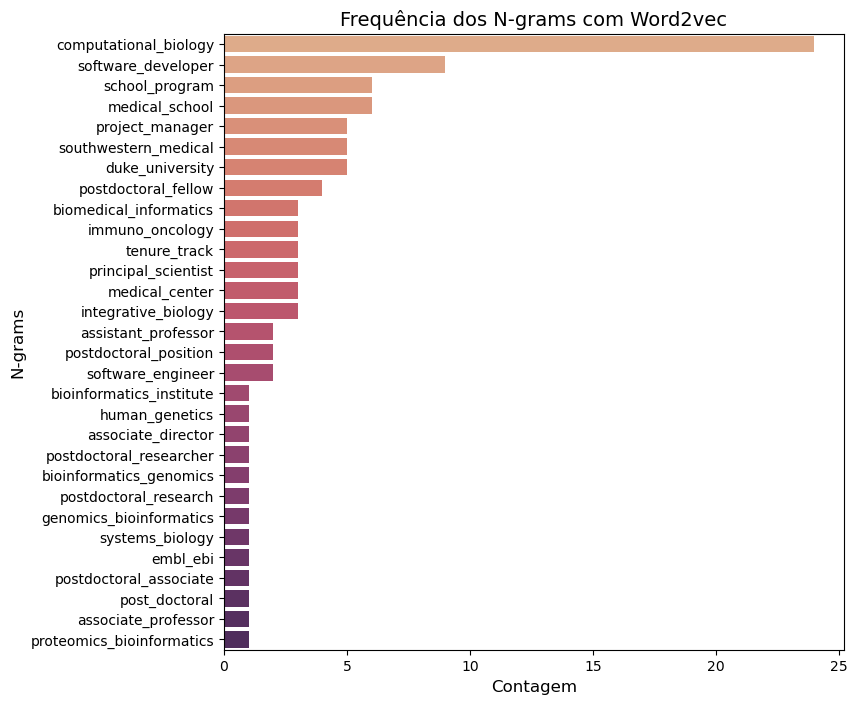

In [58]:
barras_qtd = 30
df_top = df_ngrams.sort_values('contagem', ascending=False).head(barras_qtd)

custom_palette = sns.color_palette("flare", n_colors=barras_qtd)
plt.figure(figsize=(8, 8))
sns.barplot(x='contagem', y='ngram', data=df_top, palette=custom_palette)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('N-grams', fontsize=12)
plt.title('Frequência dos N-grams com Word2vec', fontsize=14)
plt.show()